## Project to web scraping and cloud Word


In [105]:
##!pip install wordcloud

import numpy as np
import pandas as pd

from bs4 import BeautifulSoup
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import urllib.request

from PIL import Image

In [94]:
#Importando Stopwords
url_stop_words = 'https://gist.githubusercontent.com/alopes/5358189/raw/2107d809cca6b83ce3d8e04dbd9463283025284f/stopwords.txt'
req=urllib.request.Request(url_stop_words)
resp=urllib.request.urlopen(req)
data=resp.read()

data = data.decode('utf-8', 'ignore')


In [101]:
list_words = []
for i in data.split('\n'):
    i=i.replace(" ","")
    list_words.append(i)


In [10]:
#Link do Site
search_word = "Americanas" 
site = f'https://news.google.com/search?q={search_word}&hl=pt-BR&gl=BR&ceid=BR%3Apt-419'

#requisição
pagina = requests.get(site)
print(pagina.status_code)

200


In [13]:
#transformação a texto
coleta = BeautifulSoup(pagina.text, 'html.parser')

In [15]:
coleta.title

<title>Google Notícias - Pesquisar</title>

In [16]:
coleta.title.string

'Google Notícias - Pesquisar'

In [17]:
coleta.title.name

'title'

In [29]:
coleta.find(class_='ipQwMb ekueJc RD0gLb').string
# 'ipQwMb ekueJc RD0gLb' é uma classe dentro do codigo (site)

"Americanas: como as 'ordens do Beto' Sicupira definiram estratégias e a cultura da empresa"

In [30]:
coleta.find(class_='ipQwMb ekueJc RD0gLb').name

'h3'

In [31]:
len(coleta.find_all('div'))
##procura todas as ocurrencias das tag "find all"

1420

In [33]:
##Função 
def Buscar_Empresas(ticket):
    #Criando URL
    Url = f'https://news.google.com/search?q={ticket}&hl=pt-BR&gl=BR&ceid=BR%3Apt-419'

    #Resposta
    Resposta = requests.get(Url)

    #Codigo --> SOAP
    codigo_HTML = Resposta.text

    #Convert SOAP
    Objeto_Soup = BeautifulSoup(codigo_HTML,'html.parser')

    return Objeto_Soup


In [118]:
#Execução e obtenção de dados
Dados = Buscar_Empresas('Algoritmos')
len(Dados)

4

In [119]:
# Buscando Titulos
Elementos = Dados.find_all('h3')

Noticias = [Texto.get_text() for Texto in Elementos]


In [120]:
print('***' *7 )
print('*** Noticias Localizadas ***'  )
print('***' *7 )

for Numero, Loop in enumerate(Noticias[0:5]):
    print('--' * 10)
    print(Numero)
    print(Loop)


*********************
*** Noticias Localizadas ***
*********************
--------------------
0
Brasileiros desenvolvem algoritmos que detectam câncer e tuberculose
--------------------
1
Inteligência artificial: o papel dos algoritmos na tomada de decisões ...
--------------------
2
O que é algoritmo do pensamento e o que ele tem a ver com ChatGPT?
--------------------
3
Potencialize o algoritmo das suas campanhas
--------------------
4
Big techs pedem à Suprema Corte que barre ações contra algoritmos nos EUA


In [121]:
#Agrupamento de todas as palavras numa lista unica
Concatenar = ''

for Loop in Noticias:
    
    Quebra = Loop.split(' ')
    
    for Palavra in Quebra:
        Concatenar =  Concatenar + ' ' + Palavra

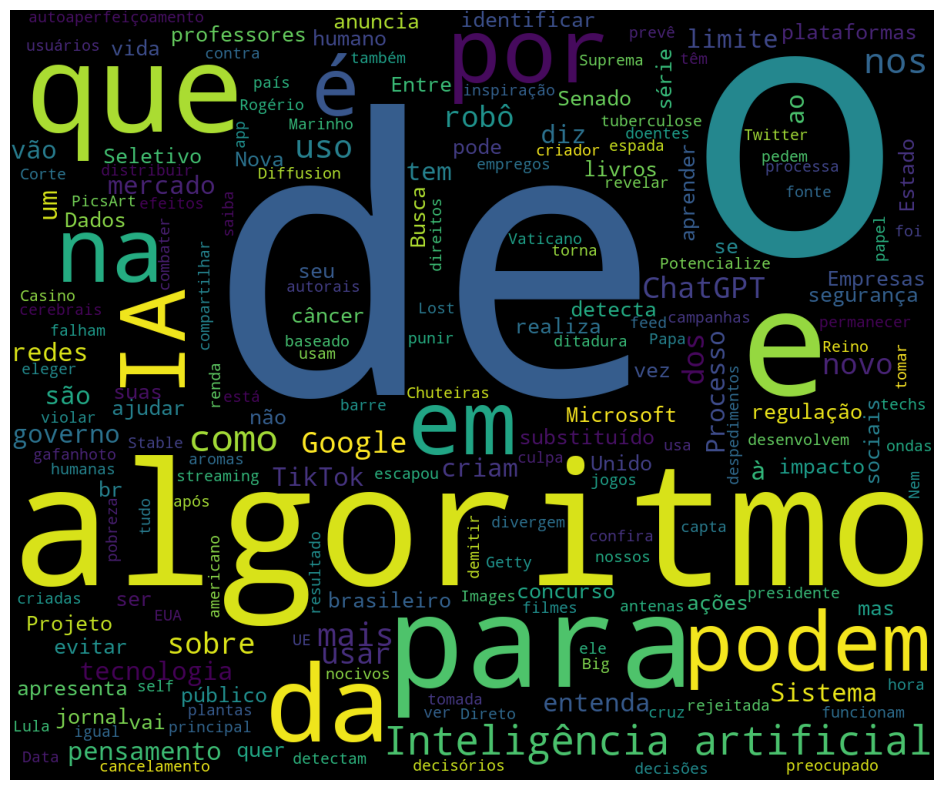

In [128]:
#Criando a nuvem de palavras

Nuvem_Palavras = WordCloud(
    width = 1200,
    height = 1000,
    ).generate(Concatenar)

Figura,Eixo = plt.subplots(figsize=(12,10))
Eixo.axis("off")
Eixo.imshow(Nuvem_Palavras)


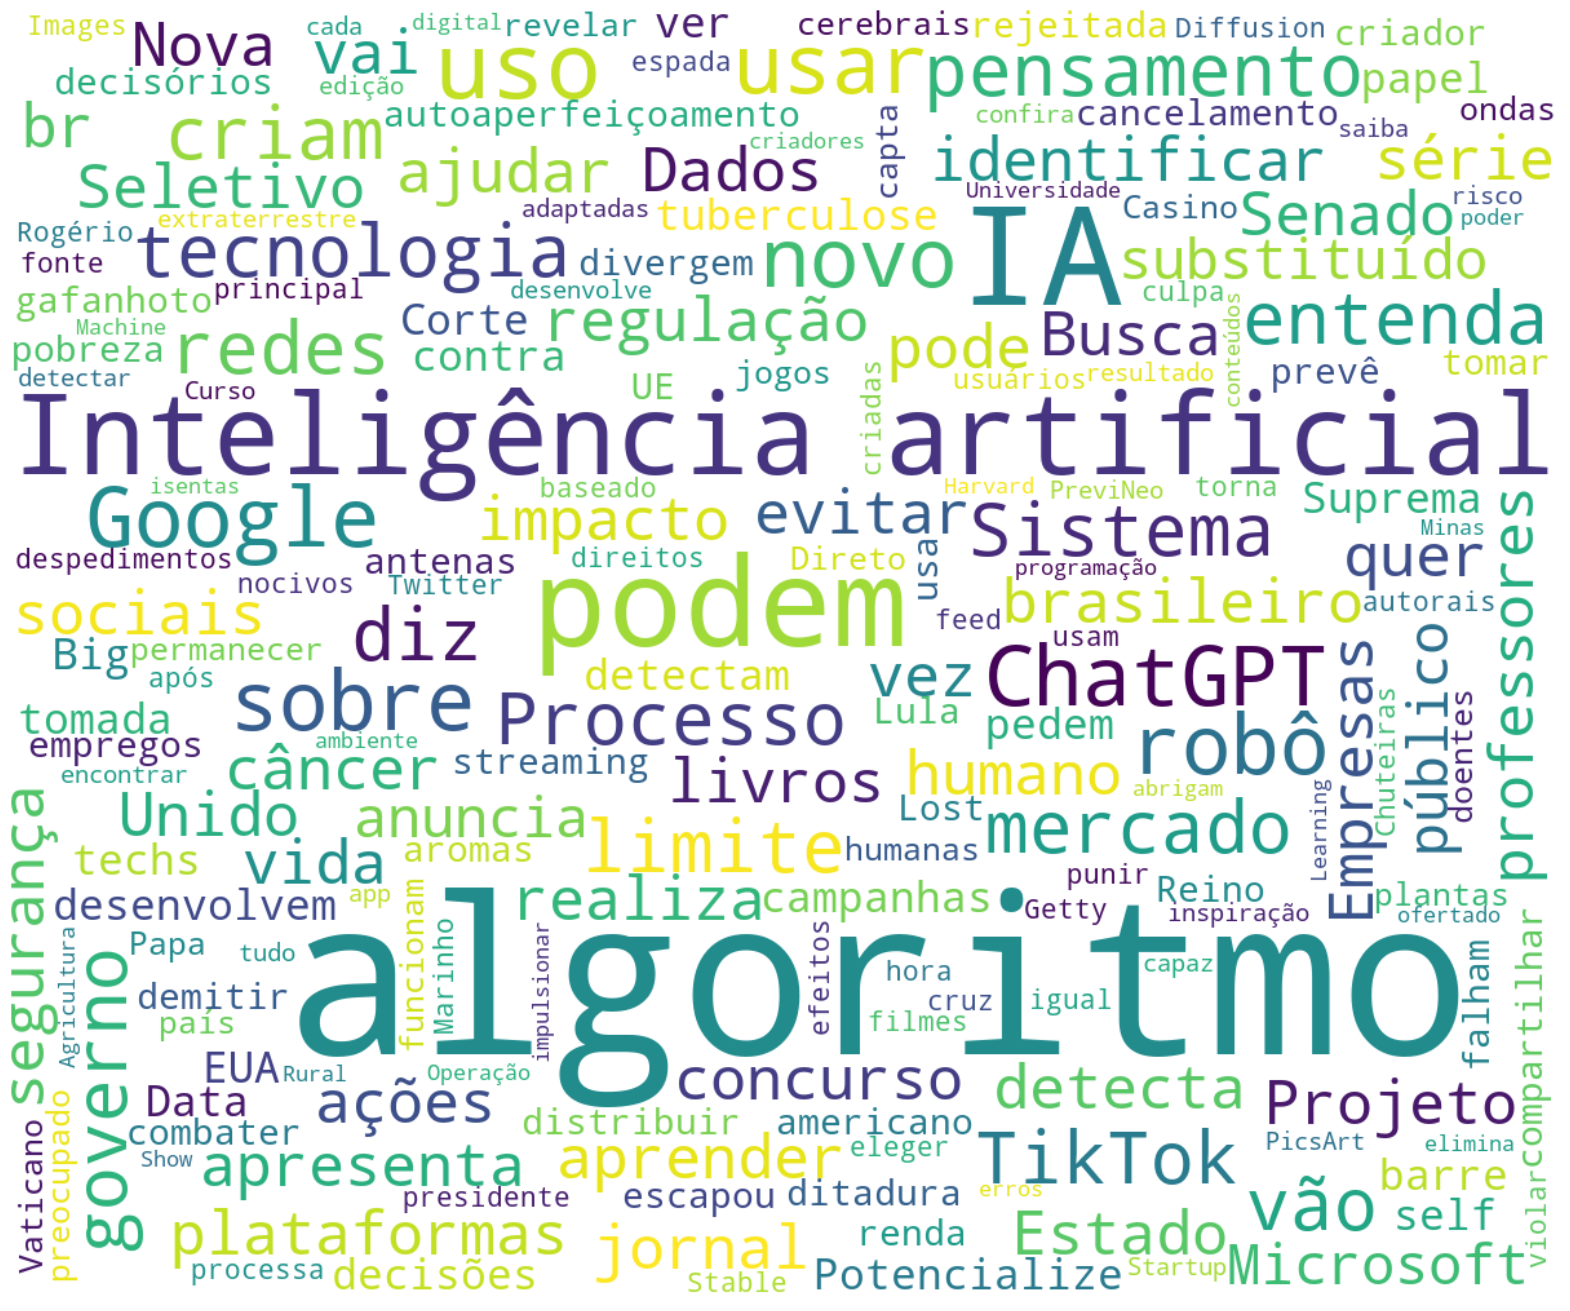

In [123]:
#Criando a nuvem de palavras

Nuvem_Palavras = WordCloud( background_color="White",
    width = 1200,
    height = 1000,
    stopwords = list_words
    ).generate(Concatenar)

plt.figure(figsize = (20,20))
plt.imshow(Nuvem_Palavras,interpolation='bilinear')
plt.axis("off")
plt.show()

In [124]:
##Carga de imagem
mascara_1 = np.array(Image.open('8b01b160728191.5a579689e5bb8.jpg'))

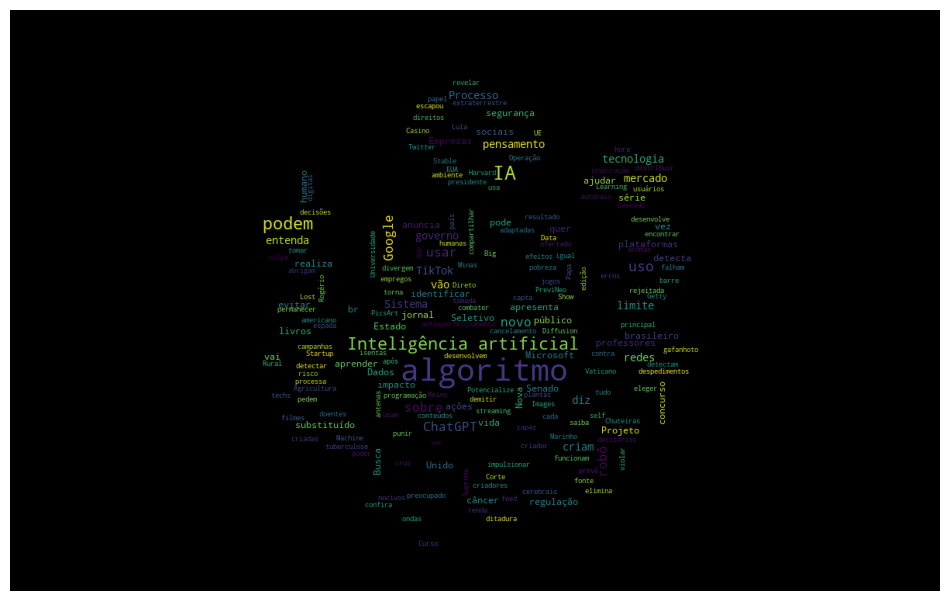

In [125]:
#Criando a nuvem de palavras

Nuvem_Palavras = WordCloud(
    width = 1200,
    height = 1000,
    mask = mascara_1,
    stopwords = list_words
    ).generate(Concatenar)

Figura,Eixo = plt.subplots(figsize=(12,10))
Eixo.axis("off")
Eixo.imshow(Nuvem_Palavras)

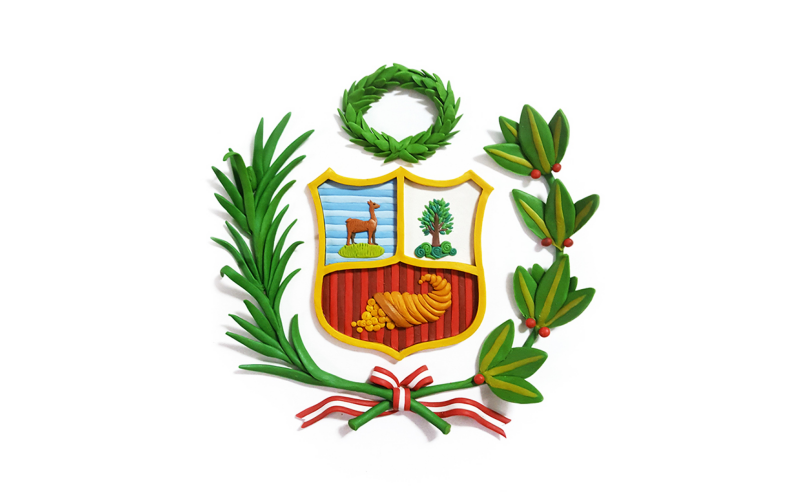

In [132]:
plt.figure(figsize = (10,10))
plt.axis("off")
plt.imshow(mascara_1)